In [55]:
import heapq
import numpy as np

def manhattan_distance(pos1, pos2):
    return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

def a_star(matrix, start, goal):
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    open_set = [(0, start)]  # Priority queue (cost, position)
    closed_set = set()
    path_matrix = [[None for _ in range(len(matrix[0]))] for _ in range(len(matrix))]
    path_matrix[start[0]][start[1]] = []
    
    while open_set:
        cost, current = heapq.heappop(open_set)
        
        if current == goal:
            return path_matrix[current[0]][current[1]]
        
        closed_set.add(current)
        
        for dx, dy in directions:
            new_x, new_y = current[0] + dx, current[1] + dy
            new_pos = (new_x, new_y)
            
            if (
                0 <= new_x < len(matrix) and 
                0 <= new_y < len(matrix[0]) and 
                matrix[new_x][new_y] == 1 and 
                new_pos not in closed_set
            ):
                new_cost = cost + 1
                heapq.heappush(open_set, (new_cost + manhattan_distance(new_pos, goal), new_pos))
                if path_matrix[new_x][new_y] is None or len(path_matrix[new_x][new_y]) > len(path_matrix[current[0]][current[1]]) + 1:
                    path_matrix[new_x][new_y] = path_matrix[current[0]][current[1]] + [current]
    
    return None  # No path found

def paths_to_idw_matrix(field, paths):
    matrix = np.zeros_like(field, dtype=float)
    print(paths)
    for path in paths:
        try:
            for i,step in enumerate(path + [goal]):
                
                matrix[step[0]][step[1]] += 1/(i+1)
        except:
            pass
    print(matrix)
    return matrix

# Example input with 1 as movable fields and 2 as unmovable fields
matrix = [
    [1, 1, 1, 1, 1],
    [1, 2, 1, 1, 1],
    [1, 1, 2, 1, 1],
    [1, 1, 1, 2, 1],
    [1, 1, 1, 1, 1]
]

start = (0, 0)
goals = [(4, 4), (4, 3), (2, 4)]

# Find paths using A* and store them in separate matrices
paths = []
for goal in goals:
    path = a_star(matrix, start, goal)
    paths.append(path)

# Print the path matrices

# Example to print the IDW matrix
idw_matrix = paths_to_idw_matrix(matrix, paths)
print("IDW Matrix:")
print(idw_matrix)


[[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4)], [(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (3, 2), (4, 2)], [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4)]]
[[3.         1.         0.66666667 0.5        0.4       ]
 [0.5        0.         0.         0.         0.33333333]
 [0.33333333 0.25       0.         0.         0.5218254 ]
 [0.         0.2        0.16666667 0.         0.125     ]
 [0.         0.         0.14285714 0.         0.        ]]
IDW Matrix:
[[3.         1.         0.66666667 0.5        0.4       ]
 [0.5        0.         0.         0.         0.33333333]
 [0.33333333 0.25       0.         0.         0.5218254 ]
 [0.         0.2        0.16666667 0.         0.125     ]
 [0.         0.         0.14285714 0.         0.        ]]


(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 4)
(2, 4)
(3, 4)
(2, 4)
(0, 0)
(1, 0)
(2, 0)
(2, 1)
(3, 1)
(3, 2)
(4, 2)
(2, 4)
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 4)
(2, 4)


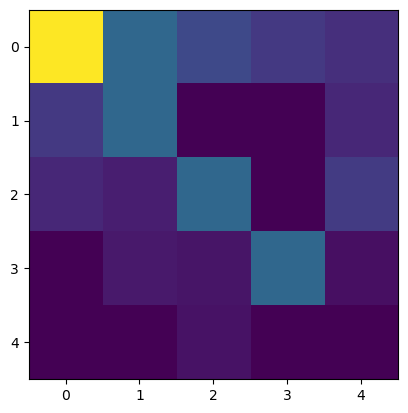

In [45]:
for path in paths:
    for i,step in enumerate(path + [goal]):
        print(step)
        matrix[step[0]][step[1]] += 1/(i+1)

import matplotlib.pyplot as plt
plt.imshow(matrix)

In [32]:
%%timeit
path_matrices = []
for goal in goals:
    path = a_star(matrix, start, goal)
    path_matrices.append(path)
    

18 µs ± 425 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
